<a href="https://colab.research.google.com/github/deepikasingh007/Sustainable-Banking-dashboard/blob/main/PROJECT_2_DEEPIKA_AIML_01001192023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SUSTAINABLE BANKING**

Deepika AIML 01001192023

**MAIN FEATURES:**

1. PREDICTING CUSTOMER'S FUTURE CARBON FOOTPRINTS USING REGRESSION

2. CUSTOMER SEGMENTATION BASED ON CARBON FOOTPRINTS USING K MEANS CLUSTERING

3. LOYALTY POINTS ASSIGNMENT

4. REGULATORY COMPLIANCE SCORES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import math

#DATASET

In [2]:
df = pd.read_csv('/content/carbon_footprint_analysis.csv')

#DATA UNDERSTANDING

In [4]:
df.head()

,Transaction_ID,Customer_ID,Transaction_Type,Amount_Spent,Frequency,Payment_Method,Merchant_Category,Location
0,1,183,Dining,817.176587,29,Debit Card,Supermarket,Rural
1,2,140,Electricity,179.013134,27,Credit Card,Online Marketplace,Rural
2,3,50,Hotel Stay,877.492290,2,Debit Card,Luxury Goods,Urban
3,4,361,Online Shopping,627.114087,28,Net Banking,Retail Store,Suburban
4,5,40,Groceries,1240.953898,23,Debit Card,Fuel Station,Rural


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     5000 non-null   int64  
 1   Customer_ID        5000 non-null   int64  
 2   Transaction_Type   5000 non-null   object 
 3   Amount_Spent       5000 non-null   float64
 4   Frequency          5000 non-null   int64  
 5   Payment_Method     5000 non-null   object 
 6   Merchant_Category  5000 non-null   object 
 7   Location           5000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 312.6+ KB


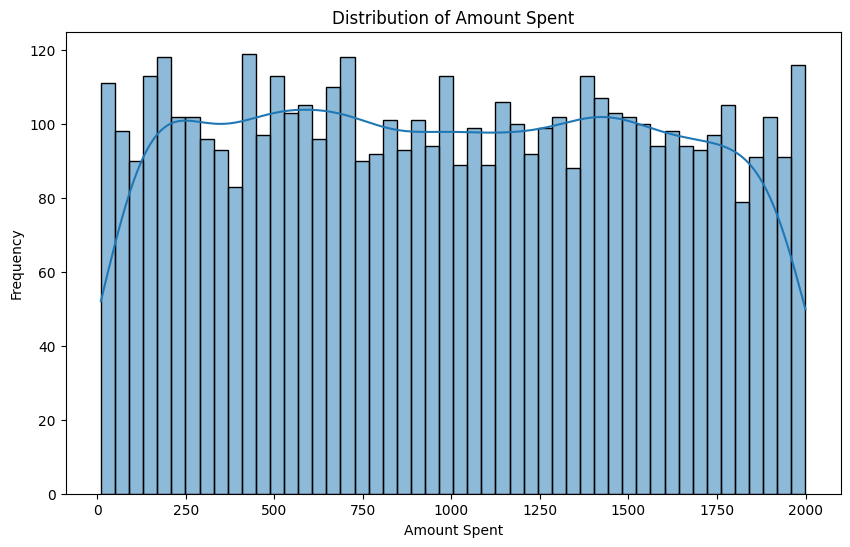

In [ ]:
# Data Visualization (Raw Dataset)
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount_Spent'], bins=50, kde=True)
plt.title('Distribution of Amount Spent')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.show()

📌 Observations

Fairly Uniform Distribution:

The histogram bars are almost evenly distributed across the range.

This means customers are spending across all ranges (from low to high amounts) relatively equally.

There’s no strong skew towards lower or higher spending.

**Slight Drop at the Ends:**

Slight dips in frequency near 0 and 2000 — fewer customers spent at the extreme ends.

**Smooth Peak in KDE Curve:**

The KDE curve fluctuates gently, suggesting no sharp spikes or concentration around a particular amount — again indicating a well-spread-out distribution.

✅ Why This Is Useful

It tells you that spending behavior is diverse, not dominated by one type of spender.

This supports using models that can learn from a broad range of values, like regression.

Also useful for segmenting customers in clustering, since behavior is not concentrated in a single region.

<ipython-input-10-5fc2ae0f969b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Transaction_Type'], palette='coolwarm')


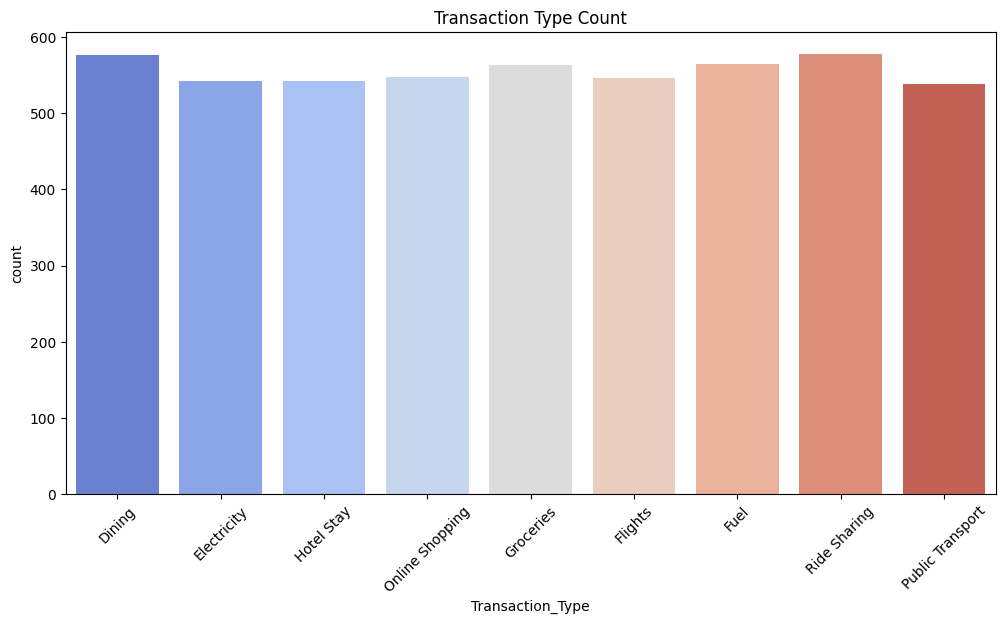

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Transaction_Type'], palette='coolwarm')
plt.title('Transaction Type Count')
plt.xticks(rotation=45)
plt.show()

📌 Observations

**Most Frequent Categories:**

Dining and Ride Sharing have the highest number of transactions — both are close to 580–600.

Indicates frequent everyday use.

**Moderate Frequency:**

Groceries, Fuel, Online Shopping, Hotel Stay, and Electricity fall in the mid-range.

All hover between 530–560 transactions — quite balanced.

**Least Frequent:**

Public Transport has the lowest count, around 530.

Still not a major drop — the dataset is well-balanced across transaction types.



<ipython-input-32-abeaa7cdd320>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Merchant_Category', data=df, palette='coolwarm')  # <- ax is defined here


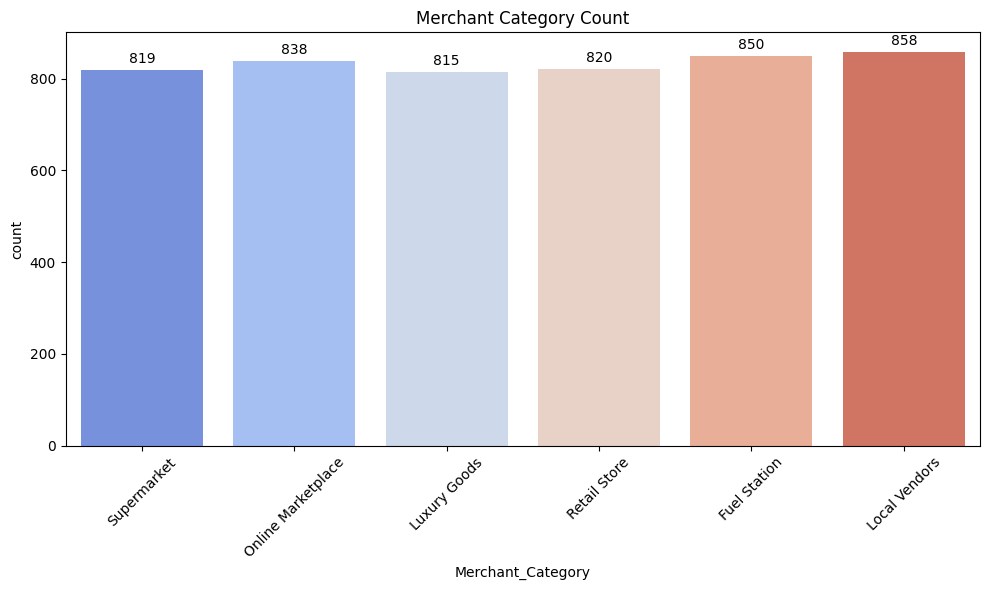

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Merchant_Category', data=df, palette='coolwarm')
plt.title('Merchant Category Count')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)
plt.tight_layout()
plt.show()

📌 Key Observations

Top Categories:

Local Vendors (858) and Fuel Station (850) are the most frequented merchant types.

This could indicate regular small purchases and essential utility usage.

Moderate Range:

Online Marketplace (838), Retail Store (820), and Supermarket (819) follow closely behind.

Reflects a balanced shopping pattern across both physical and digital platforms.

Lowest (Yet Still High):

Luxury Goods (815) has the fewest transactions, but the difference is minimal.

Shows that luxury spending is still quite prevalent in this dataset.



<ipython-input-9-0c9f9531ec50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Location'], y=df['Amount_Spent'], palette='coolwarm')


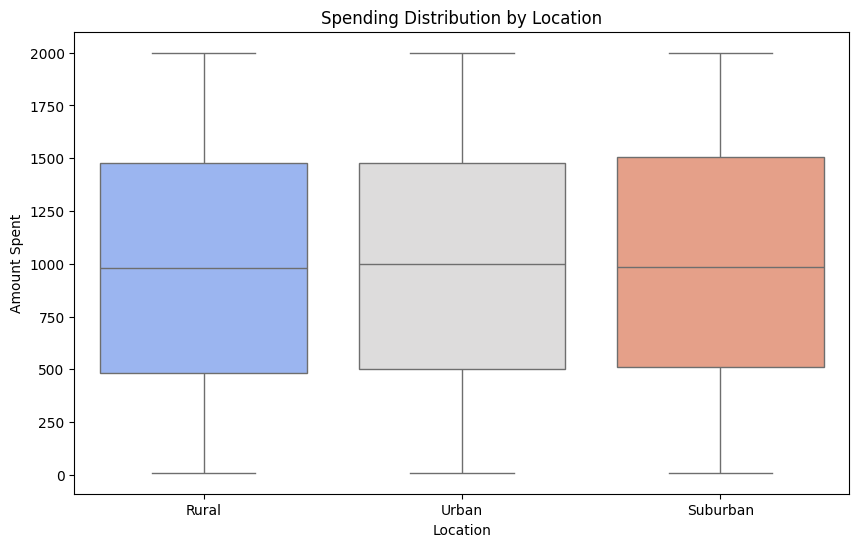

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Location'], y=df['Amount_Spent'], palette='coolwarm')
plt.title('Spending Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Amount Spent')
plt.show()

📌Key Insights

**Median Spending is Similar:**

All three locations have very similar medians (close to 1000), showing that people across different regions spend almost equally in the central range.

**Distribution Spread:**

Urban and Suburban areas show a slightly wider IQR, meaning more variability in middle-range spending.

Rural spending shows a tighter lower quartile but an equally long upper whisker, suggesting fewer low-spenders compared to urban.

**Maximum and Minimum Values:**

All locations have a max spending near 2000 and min close to 0, so the overall spending capacity is consistent.



#DATA PREPARATION

In [6]:
import pandas as pd
# Defining industry emission factors (kg CO₂e per $ spent)
emission_factors = {
    'Flights': 0.75,
    'Fuel': 2.4,
    'Electricity': 0.5,
    'Hotel Stay': 0.4,
    'Public Transport': 0.15,
    'Online Shopping': 0.3,
    'Groceries': 0.2,
    'Dining': 0.35,
    'Ride Sharing': 0.5
}
# Computing estimated emissions
df['Estimated_Emission'] = df['Amount_Spent'] * df['Transaction_Type'].map(emission_factors)

In [7]:
df["Estimated_Emission"].head(10)

,Estimated_Emission
0,286.011806
1,89.506567
2,350.996916
3,188.134226
4,248.190780
5,337.427655
6,215.861327
7,511.885899
8,48.367886
9,3374.891411


- `df['Transaction_Type'].map(emission_factors)`:
  - This replaces each transaction type in the DataFrame with its corresponding emission factor from the dictionary.

- `df['Amount_Spent'] `:
  - Multiplies the **amount spent** for each row with the respective **emission factor** to calculate **estimated emissions**.

- `df['Estimated_Emission'] = `:
  - Adds a **new column** to the DataFrame called `"Estimated_Emission"` with the calculated values.


In [8]:
# Applying Log Transformation to Amount_Spent
df['Amount_Spent'] = np.log1p(df['Amount_Spent'])

In [9]:
# One-Hot Encoding Categorical Features
df = pd.get_dummies(df, columns=['Transaction_Type', 'Payment_Method', 'Merchant_Category', 'Location'], drop_first=True)

In [10]:
# Creating Interaction Features
df['Spending_Frequency_Interaction'] = df['Amount_Spent'] * df['Frequency']

In [11]:
# Feature Selection
X = df.drop(columns=['Transaction_ID', 'Customer_ID', 'Estimated_Emission'])
y = df['Estimated_Emission']

In [12]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = StandardScaler().fit_transform(y.values.reshape(-1, 1)).flatten()

In [13]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

#MODELING

**Goal: Predict a customer's future carbon footprint based on past transactions.**

In [14]:
# RandomForest Model with GridSearchCV
param_grid_rf = {'n_estimators': [100, 300, 500], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]} #hyper parameter tuning
rf_model = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.best_estimator_.predict(X_test)
rf_mse, rf_rmse, rf_r2 = mean_squared_error(y_test, y_pred_rf), math.sqrt(mean_squared_error(y_test, y_pred_rf)), r2_score(y_test, y_pred_rf)

🔁 1. What is GridSearchCV doing here?

GridSearchCV is being used to tune the hyperparameters of RandomForestRegressor. Instead of manually picking the best parameters, GridSearchCV tries out all combinations from the param_grid_rf and finds the best one based on cross-validation performance.

 - This defines the **grid of hyperparameters** to search:
  - `n_estimators`: Number of trees in the forest.
  - `max_depth`: Maximum depth of each tree (`None` = full depth).

  ✅ Why only 3 values?
1. To cover a range of model complexity
None → No restriction → allows trees to grow fully (max complexity).

 10 → Medium depth → balances between overfitting and underfitting.

 20 → More complex than 10 → captures more patterns if needed.

 This gives you:

 A low-bias model (None)

 A regularized option (10)

 A midpoint to explore (20)

2. Avoiding computation overload
Each value in the grid is tested across all combinations of other hyperparameters (n_estimators, min_samples_split, etc.) and for each fold in cross-validation.

 Too many values = exponential increase in training time.
  - `min_samples_split`: Minimum samples required to split an internal node.

**GridSearchCV:** Performs exhaustive search over the grid.In the context of Grid Search, “exhaustive” means that the algorithm will systematically test every single combination of the hyperparameters you provide.



**RandomForestRegressor(random_state=42):** The model you are tuning.

**param_grid_rf:** The parameter grid defined above.

**cv=5: 5-fold cross-validation** (splits training data into 5 parts and rotates the validation set).

🧠 2. How does GridSearchCV use cross-validation?

 specified cv=5, so for each parameter combination, it will:

Split your training data into 5 folds

Train on 4 folds and validate on the 1 remaining fold

Repeat this 5 times (each fold gets a turn as validation set)

Average the validation scores across all 5 folds

Pick the combination that gives the best average validation score

✅ This helps avoid overfitting to a single train-test split and gives a more robust estimate of model performance.

**n_jobs=-1:** Uses all CPU cores for faster computation.

Makes predictions on the test set using the best model found during the grid search.

Evaluation done using mse, rmse and R squared score.


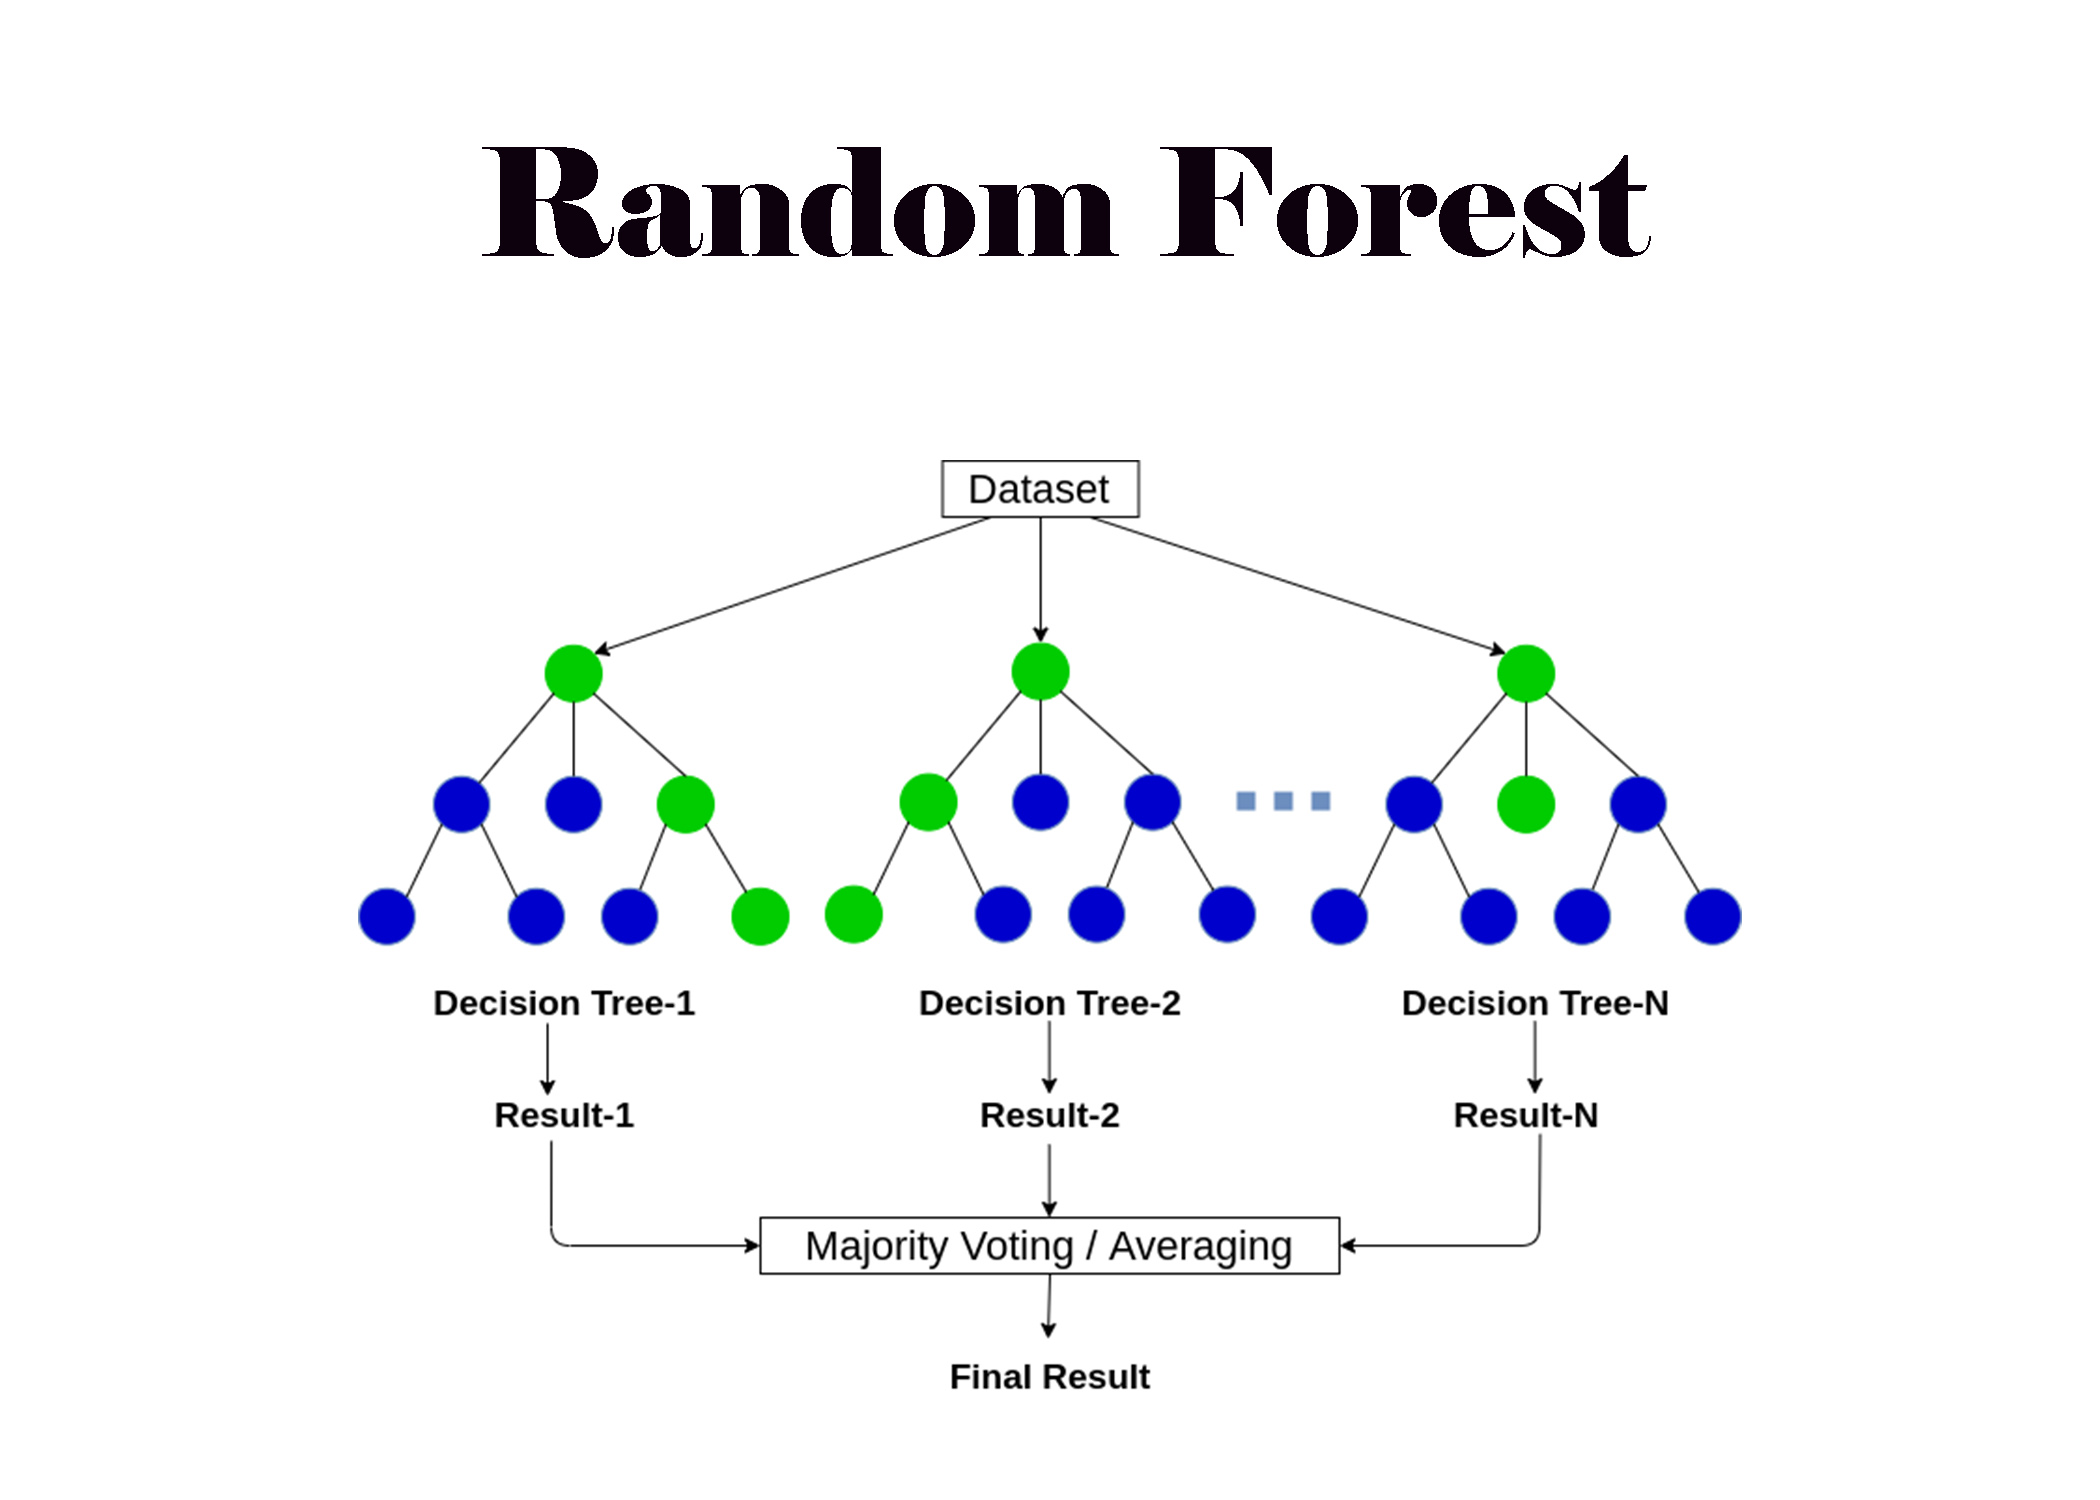

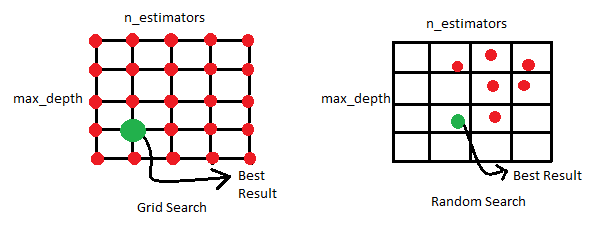

🟢 Key point:

Grid Search systematically tries every combination in a grid you define. It’s exhaustive but can be slow and may miss the best value if it’s between grid steps.

Random Search randomly samples combinations from a parameter distribution. It’s faster and often finds a better model in less time, especially when only a few hyperparameters really matter.

In [15]:
print("RandomForest MSE:", rf_mse)
print("RandomForest RMSE:", rf_rmse)
print("RandomForest R² Score:", rf_r2)

RandomForest MSE: 1.744263747031048e-05
RandomForest RMSE: 0.004176438371424925
RandomForest R² Score: 0.9999834896801575


In [21]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y_scaled, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)
y_pred_lr = lr_model.predict(X_test_poly)
lr_mse, lr_rmse, lr_r2 = mean_squared_error(y_test, y_pred_lr), math.sqrt(mean_squared_error(y_test, y_pred_lr)), r2_score(y_test, y_pred_lr)

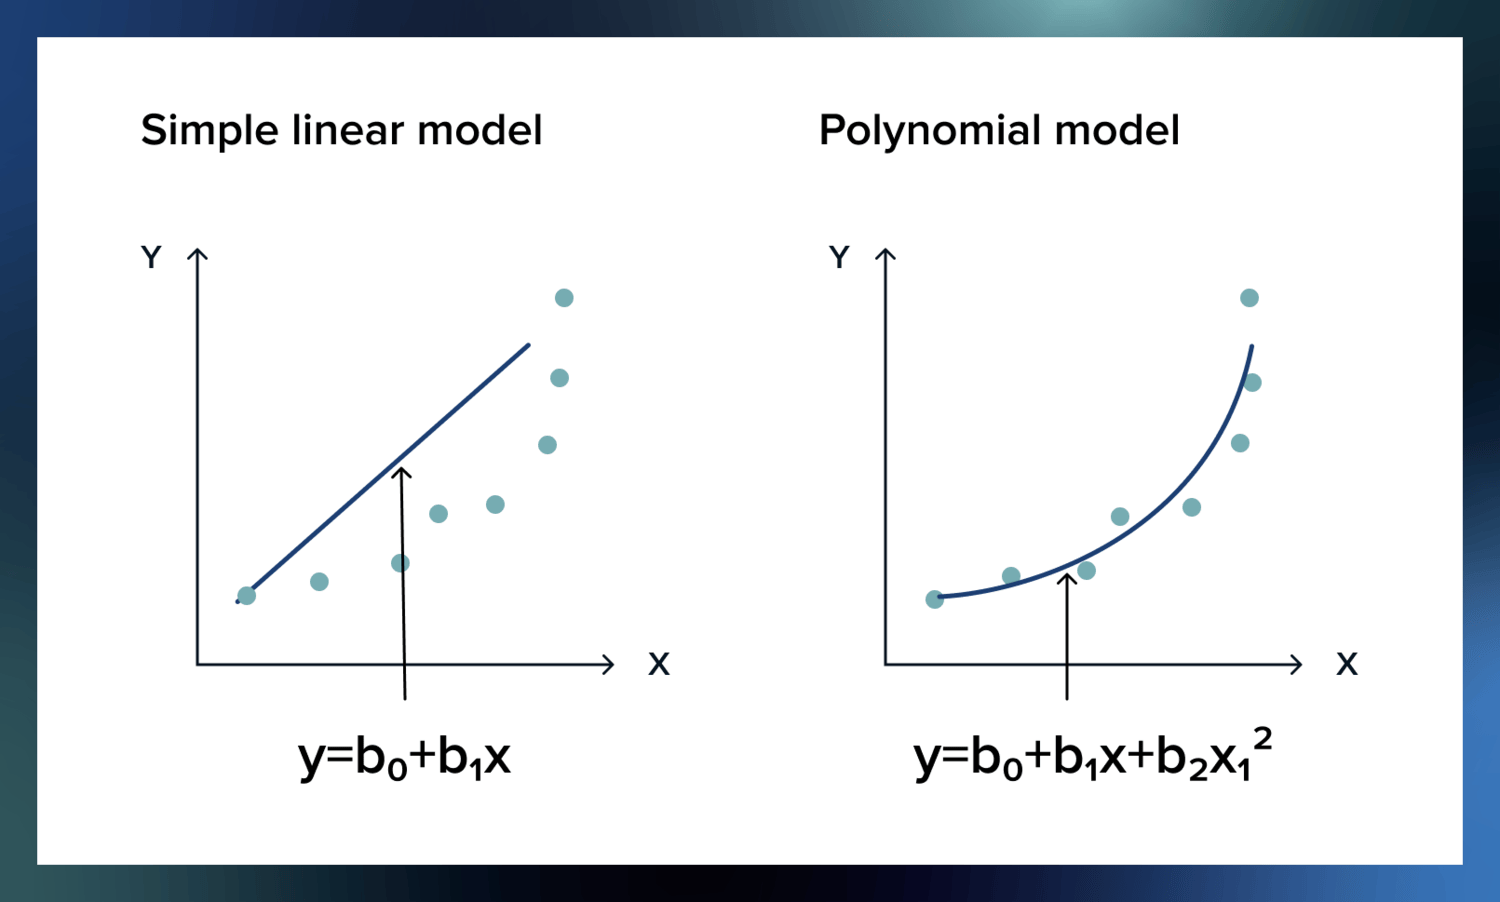

🔢 What is Polynomial Regression?

Polynomial Regression is a type of Linear Regression where the relationship between the independent variable(s) and the dependent variable is modeled as an nth-degree polynomial.

🤔 Why use Polynomial Regression?

Linear Regression only works well when data follows a straight-line trend.

Polynomial Regression is used when data shows non-linear patterns, but you still want a regression-type approach.

It helps capture curves, bends, and complex relationships between the features and the target.

✅ Creates polynomial features up to degree 2
(e.g., for features x1 and x2, it adds x1², x2², and x1*x2).

✅ Transforms the scaled input features X_scaled into polynomial features.
Now the feature space is expanded with non-linear combinations.

✅ Splits the polynomial-transformed features and corresponding scaled target y_scaled into training (80%) and testing (20%) sets.

✅ Initializes and fits a Linear Regression model on the polynomial-transformed data.

✅ Uses the trained model to make predictions on the test data.

Evaluation done using mse, rmse and R squared score.



In [22]:
print("Polynomial Regression MSE:", lr_mse)
print("Polynomial Regression RMSE:", lr_rmse)
print("Polynomial Regression R² Score:", lr_r2)

Polynomial Regression MSE: 0.04948053355574026
Polynomial Regression RMSE: 0.22244220273082232
Polynomial Regression R² Score: 0.9531642255150902


In [16]:
# Decision Tree Model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_mse, dt_rmse, dt_r2 = mean_squared_error(y_test, y_pred_dt), math.sqrt(mean_squared_error(y_test, y_pred_dt)), r2_score(y_test, y_pred_dt)

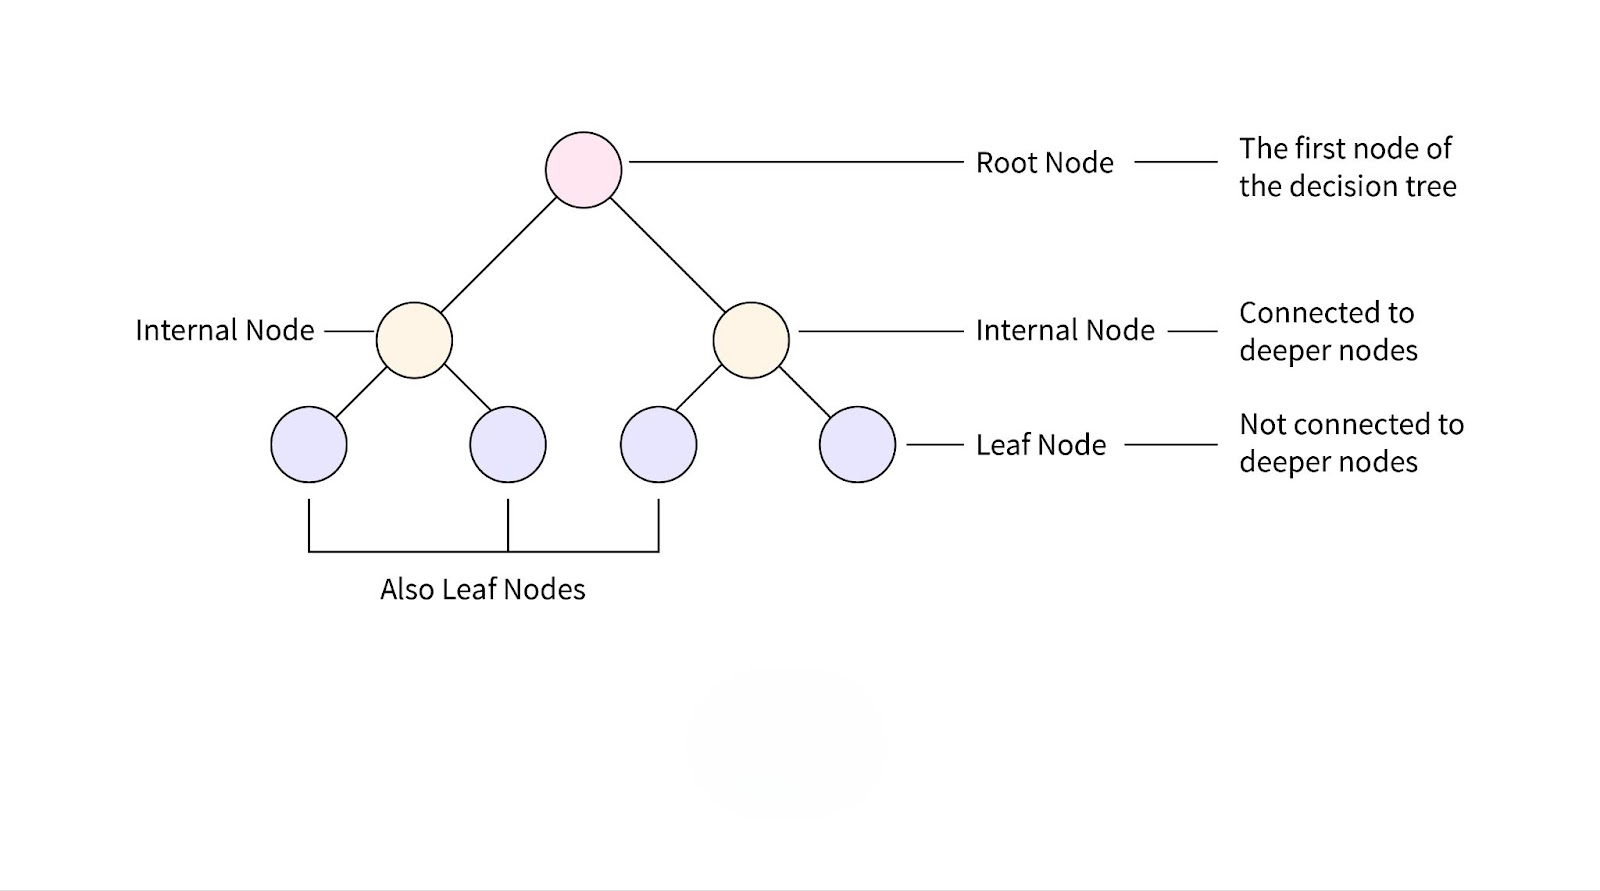

🌳 What is a Decision Tree Model?

A Decision Tree Regressor is a machine learning model that splits the dataset into smaller and smaller parts using decision rules, and then fits a simple prediction (like the average value) in each part.

🔍 How it works (for regression):

Start with the whole dataset.

Find the best feature and value to split the data so that each group is as homogeneous as possible (i.e., similar target values).

Keep splitting each resulting group the same way (recursively).

Once a stopping condition is met (like max depth, or no improvement in split), the tree stops splitting.

The average value of the training samples in a leaf node becomes the prediction for new samples that fall into that path.



✅ Initializes a Decision Tree Regressor — a model that splits the data into branches to make predictions based on learned rules.

✅ Trains the decision tree model on the training dataset (X_train, y_train).

✅ Makes predictions for the test dataset (X_test).

Evaluation done using mse, rmse and R squared score.


In [17]:
print("Decision Tree MSE:", dt_mse)
print("Decision Tree RMSE:", dt_rmse)
print("Decision Tree R² Score:", dt_r2)

Decision Tree MSE: 5.624086207552981e-05
Decision Tree RMSE: 0.007499390780292077
Decision Tree R² Score: 0.9999467652399091


In [18]:
from sklearn.neighbors import KNeighborsRegressor
# K-Nearest Neighbors Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_mse, knn_rmse, knn_r2 = mean_squared_error(y_test, y_pred_knn), math.sqrt(mean_squared_error(y_test, y_pred_knn)), r2_score(y_test, y_pred_knn)

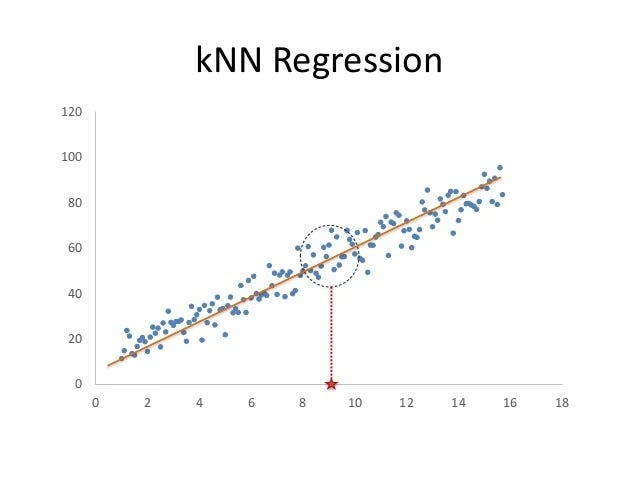

✅ Imports the KNN regression model from scikit-learn.

✅ Initializes the KNN Regressor with k=5 — meaning it looks at the 5 closest neighbors (based on distance) to predict the value.

✅ Trains the KNN model using the training features and target values.

✅ Predicts the output for the test dataset by averaging the target values of the 5 nearest neighbors for each test point.

✅ Evaluation metrics:

knn_mse: Mean Squared Error — average squared difference between predictions and actuals.

knn_rmse: Root Mean Squared Error — same as above but in actual units.

knn_r2: R² Score — measures how well predictions approximate actual outcomes.



In [19]:
print("KNN MSE:", knn_mse)
print("KNN RMSE:", knn_rmse)
print("KNN R² Score:", knn_r2)

KNN MSE: 0.20795961066194485
KNN RMSE: 0.45602588814884715
KNN R² Score: 0.8031559337176435


In [20]:
import joblib
joblib.dump(rf_model.best_estimator_, "rf_model.pkl")
joblib.dump(dt_model, "dt_model.pkl")
joblib.dump(knn_model, "knn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

#EVALUATION METHODOLOGY

1. 📉 Mean Squared Error (MSE)

🔍 What is it?

MSE measures the average of the squared differences between the predicted values and the actual values.

**FORMULA:** 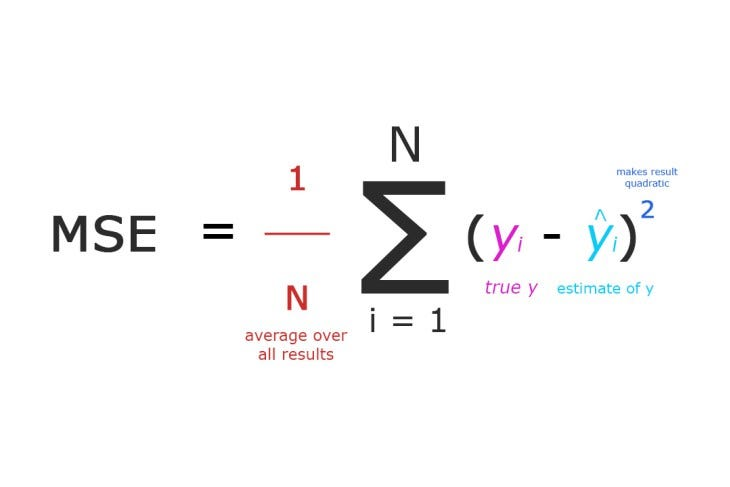

💡 Intuition:

Squaring makes all errors positive and penalizes larger errors more heavily.

A lower MSE means the predictions are close to the actual values.

2. 📏 Root Mean Squared Error (RMSE)

🔍 What is it?

RMSE is the square root of MSE. It brings the error metric back to the original unit of the target variable.

**FORMULA:** 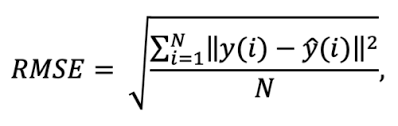

💡 Intuition:
More interpretable than MSE since it’s in the same unit as the target.

Helps understand "on average, how much does the model miss by?"


3. 📊 R-squared (R² or Coefficient of Determination)

🔍 What is it?

R² indicates how well your model explains the variability of the target variable. It's a relative metric.

🧮 Formula: 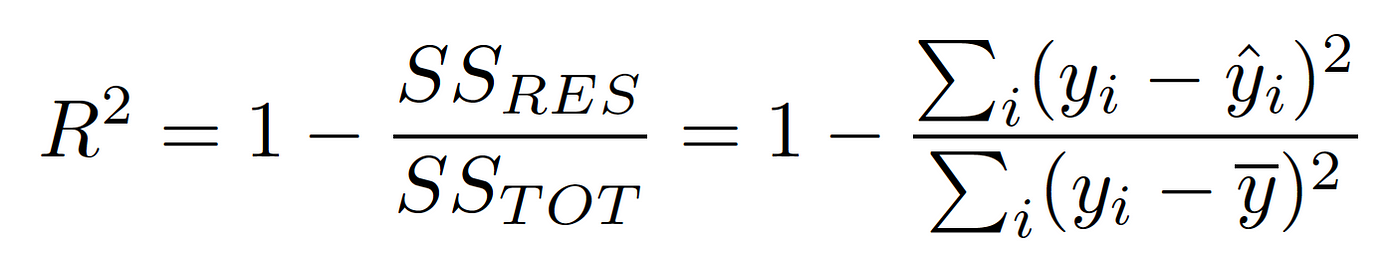

Where:
SSres=esidual sum of squares

SStot=total sum of squares

💡 Intuition:
R² = 1: perfect prediction

R² = 0: model does no better than the mean

R² < 0: model is worse than predicting the mean

In [23]:
# Visualization of Model Performance
models = ['RandomForest', 'Polynomial Regression', 'Decision Tree', 'KNN']
mse_values = [rf_mse, lr_mse, dt_mse, knn_mse]
rmse_values = [rf_rmse,  lr_rmse, dt_rmse, knn_rmse]
r2_values = [rf_r2, lr_r2, dt_r2, knn_r2]

/tmp/ipython-input-24-2654786926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette='coolwarm')


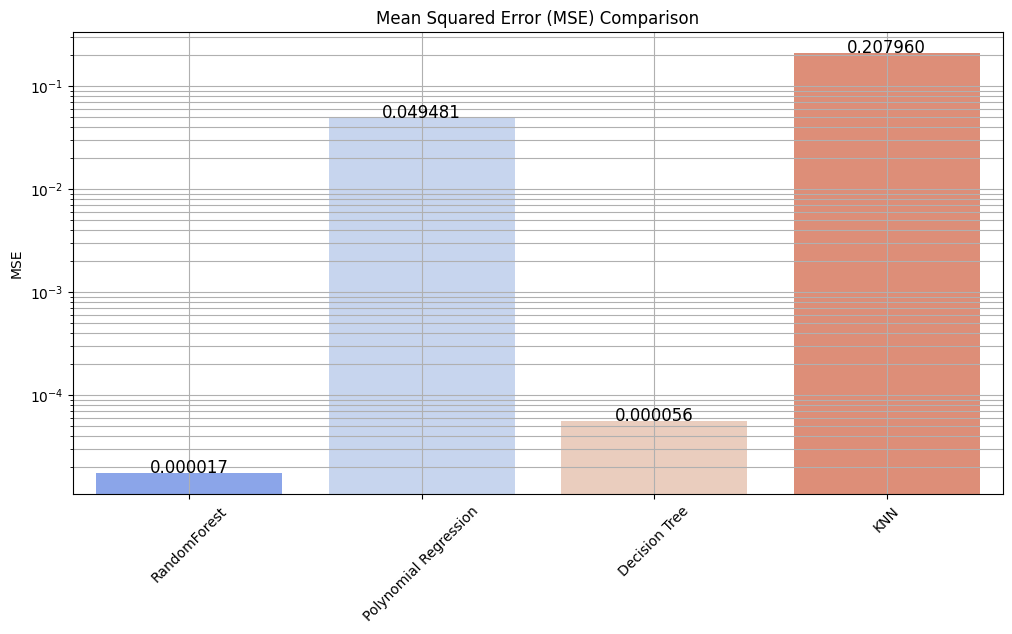

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=mse_values, palette='coolwarm')
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(True, which='both')
for i, v in enumerate(mse_values):
    plt.text(i, v, f'{v:.6f}', ha='center', fontsize=12)
plt.show()

/tmp/ipython-input-25-2894507578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_values, palette='coolwarm')


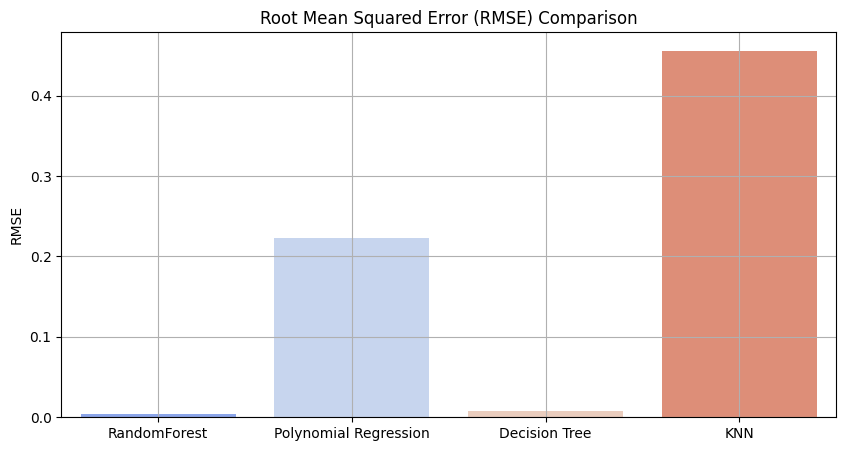

In [25]:
# RMSE Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=rmse_values, palette='coolwarm')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

/tmp/ipython-input-26-1314982299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=r2_values, palette='coolwarm')


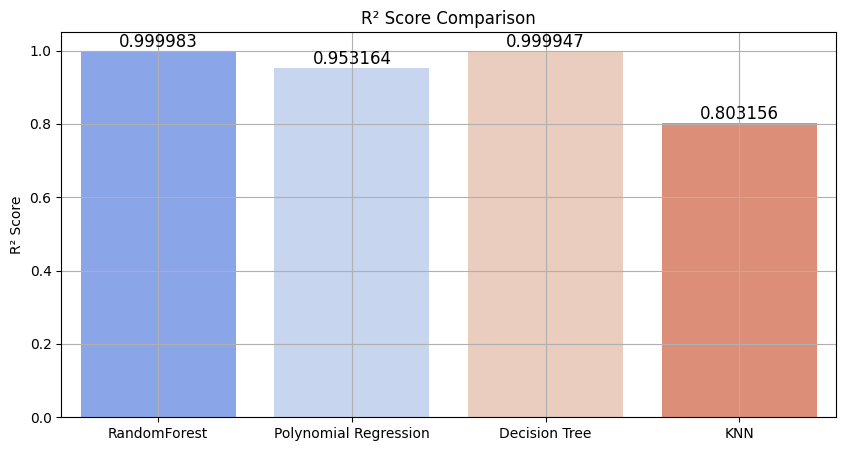

In [26]:
# R² Score Visualization
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=models, y=r2_values, palette='coolwarm')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.grid(True)
for i, v in enumerate(r2_values):
    ax.text(i, v + 0.01, f"{v:.6f}", ha='center', fontsize=12)
plt.show()

#Best Model is RandomForest


In [27]:
df['Predicted_Emission'] = rf_model.best_estimator_.predict(df.drop(columns=['Transaction_ID', 'Customer_ID', 'Estimated_Emission']))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [54]:
best_model = rf_model.best_estimator_
best_model.feature_names = X.columns.tolist()
joblib.dump(best_model, 'rf_best_model.pkl')

['rf_best_model.pkl']

In [28]:
df['Carbon_Score'] = pd.qcut(df['Estimated_Emission'], q=5, labels=[5, 4, 3, 2, 1])  # 5 (High Impact) → 1 (Eco-Friendly)

💡 What It Does:

pd.qcut(): This function divides the data into quantiles — in this case, 5 equal-sized groups (20% each).

q=5: You're splitting the Estimated_Emission values into 5 quantiles.

labels=[5, 4, 3, 2, 1]: Assigns labels to each group — where:

5 = Highest Emissions (Least Eco-Friendly)

1 = Lowest Emissions (Most Eco-Friendly)

This creates a ranking system for carbon emissions. Each transaction is now scored from 1 (greenest) to 5 (most polluting).



In [29]:
df.head()

,Transaction_ID,Customer_ID,Amount_Spent,Frequency,Estimated_Emission,Transaction_Type_Electricity,Transaction_Type_Flights,Transaction_Type_Fuel,Transaction_Type_Groceries,Transaction_Type_Hotel Stay,...,Merchant_Category_Local Vendors,Merchant_Category_Luxury Goods,Merchant_Category_Online Marketplace,Merchant_Category_Retail Store,Merchant_Category_Supermarket,Location_Suburban,Location_Urban,Spending_Frequency_Interaction,Predicted_Emission,Carbon_Score
0,1,183,6.707078,29,286.011806,False,False,False,False,False,...,False,False,False,False,True,False,False,194.505268,0.091759,3
1,2,140,5.193030,27,89.506567,True,False,False,False,False,...,False,False,True,False,False,False,False,140.211805,0.091622,5
2,3,50,6.778207,2,350.996916,False,False,False,False,True,...,False,True,False,False,False,False,True,13.556414,0.092464,3
3,4,361,6.442722,28,188.134226,False,False,False,False,False,...,False,False,False,True,False,True,False,180.396211,0.090962,4
4,5,40,7.124441,23,248.190780,False,False,False,True,False,...,False,False,False,False,False,False,False,163.862146,0.091780,4


In [30]:
# Convert Carbon_Score to Numeric
df["Carbon_Score"] = pd.to_numeric(df["Carbon_Score"], errors='coerce')

In [31]:
# Group by customer to get total predicted emission and average carbon score
customer_features = df.groupby('Customer_ID').agg({
    'Predicted_Emission': 'sum',
    'Carbon_Score': 'mean'
}).reset_index()

Total Predicted Emission per Customer

➤ Predicted_Emission: 'sum'
➝ Adds up all predicted emissions for each customer.

Average Carbon Score per Customer

➤ Carbon_Score: 'mean'
➝ Averages the carbon score for each customer.

In [32]:
import pandas as pd
correlation = df['Predicted_Emission'].corr(df['Carbon_Score'])
print(f"Correlation: {correlation}")

Correlation: -0.004040732313170501


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['Predicted_Emission', 'Carbon_Score']])

In [34]:
from sklearn.decomposition import PCA

#PCA

 Principal Component Analysis (PCA) is a dimensionality reduction technique.

  It helps you:

 Understand complex, high-dimensional data.

 Visualize data better (usually in 2D or 3D).

 Remove noise and redundant features.

 Speed up ML algorithms by reducing the number of input variables.

 **🎯Why Use PCA?**

 Imagine your dataset has many features, Some of these features are correlated and
 redundant. PCA simplifies this data by finding new axes (directions) that explain the most variation.

 **🧩How PCA Works:**

 1. Standardize the Data PCA is sensitive to scale.
 So first we standardize the features (mean = 0, variance = 1).
 2. Compute the Covariance Matrix
 This matrix shows how variables are related to each other.

  **A positive covariance:** variables increase together.

  **A negative covariance:** one increases while the other decreases.
 3. Find Eigenvectors and Eigenvalues Eigenvectors → directions (principal components).
 Eigenvalues → amount of variance in the direction.
 They help PCA rotate the dataset and re-align the axes to the directions where the data varies most.
 4. Choose Principal Components
 We sort eigenvalues (variances) and keep the top k ones that explain most of the variance.

 **💡Rule of thumb:** choose components that explain 80–95% of the total variance.

 5. Project the Data

 Now our original data is re-expressed in terms of new axes (PC1, PC2).
 These are the principal components.
 You can now plot your high-dimensional data in 2D space


Calculates the covariance matrix internally.

Finds eigenvectors and eigenvalues.

Projects your high-dimensional data onto 2D.

 ✅X_pca = pca.fit_transform(X_scaled) This transforms your high-dimensional feature space into principal components (a reduced 2D
 version of your data).

 The result X_pca is a 2D NumPy array where:

 Each row is a data point.

 The first column is the value of Principal Component 1.

 The second column is Principal Component 2.

 ✅X_pca[:, 0] Selects all values from PC1 (first column).

 ✅X_pca[:, 1] Selects all values from PC2 (second column)

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features )

In [36]:
from sklearn.cluster import KMeans

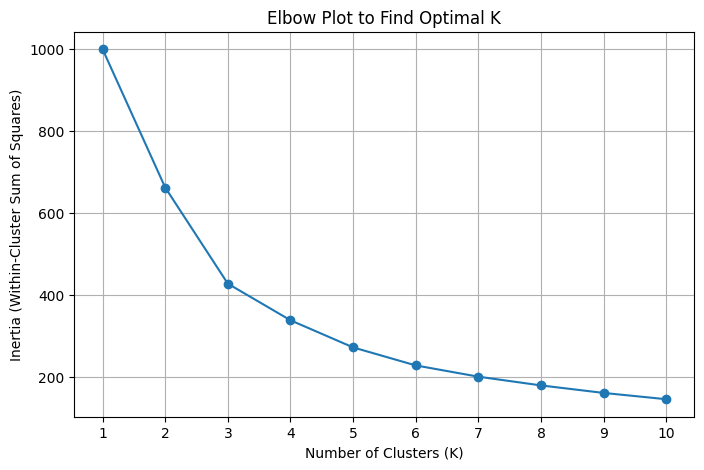

In [37]:
# Elbow Method
inertia = []  # Sum of squared distances to closest cluster center
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Plot to Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

Optimal value for K from the elbow plot is coming 3

CUSTOMER SEGMENTATION

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(X_pca)

Import the Algorithm: Imports the KMeans class from scikit-learn's clustering module.

Initialize the Model with specific parameters:

**n_clusters=3:** Divides customers into exactly 3 segments (as shown in your PCA visualization with green, orange, and blue points).

**random_state=42:** Sets a fixed seed for reproducibility, ensuring you get the same cluster assignments if you run the code again.

**n_init=10:** Runs the algorithm 10 times with different centroid initializations and selects the best result (lowest inertia/within-cluster sum of squares).

Fit and Predict in One Step:

**fit_predict()** both trains the model on your data and returns cluster assignments.

scaled_features contains your normalized customer attributes (scaling is crucial for K-means to work properly).

The results (0, 1, or 2) are stored in a new 'Cluster' column in your DataFrame.

In [39]:
# Identify cluster with highest emission as 'High Carbon Spender' and so on
cluster_means = customer_features.groupby('Cluster')['Predicted_Emission'].mean().sort_values()
cluster_labels = {
    cluster_means.index[0]: 'Eco-Friendly',
    cluster_means.index[1]: 'Moderate',
    cluster_means.index[2]: 'High Carbon Spender'
}
customer_features['Segment'] = customer_features['Cluster'].map(cluster_labels)

#MANAGERIAL IMPLICATIONS

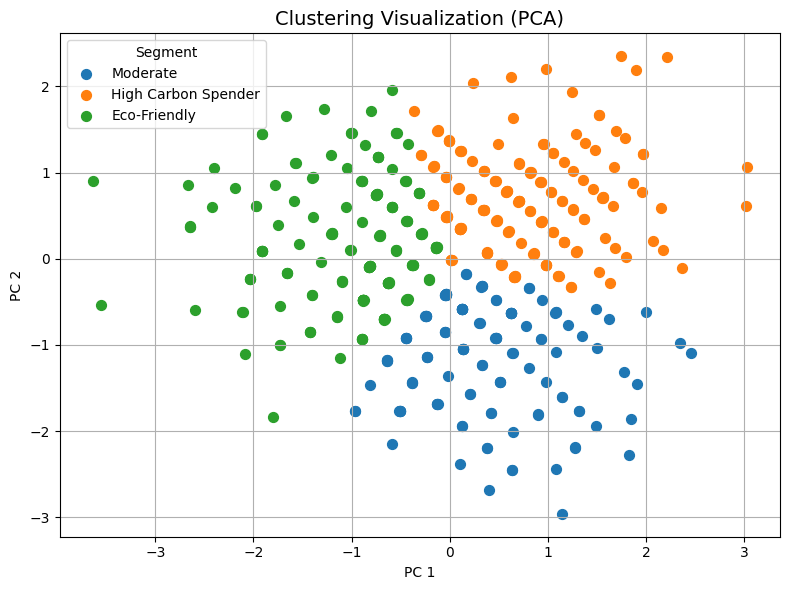

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Add PCA results to dataframe
# PCA for visualization
pca = PCA(n_components=2)
customer_features['PC1'] = X_pca[:, 0]
customer_features['PC2'] = X_pca[:, 1]
# Plot with semantic segment labels
plt.figure(figsize=(8, 6))
for segment in customer_features['Segment'].unique():
    subset = customer_features[customer_features['Segment'] == segment]
    plt.scatter(subset['PC1'], subset['PC2'], label=segment, s=50)
plt.title('Clustering Visualization (PCA)', fontsize=14)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title='Segment')
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
from sklearn.metrics import silhouette_score
# Compute silhouette score using the same scaled features used in clustering
score = silhouette_score(X_pca, customer_features['Cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.351


This score suggests good clustering

In [42]:
y_scaler = StandardScaler()
y_scaler.fit(y.values.reshape(-1, 1))  # Fit only on y before training
# Convert back to original scale
y_test_actual = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_rf_actual = y_scaler.inverse_transform(y_pred_rf.reshape(-1, 1)).flatten()
# Convert to DataFrame
comparison_df_actual = pd.DataFrame({
    'Actual_Emission': y_test_actual,
    'RandomForest_Predicted': y_pred_rf_actual,
})
print(comparison_df_actual.head())

   Actual_Emission  RandomForest_Predicted
0       479.901375              480.470226
1       238.428219              239.980320
2       257.138821              256.910318
3       174.564273              175.483902
4      4233.059838             4242.273797


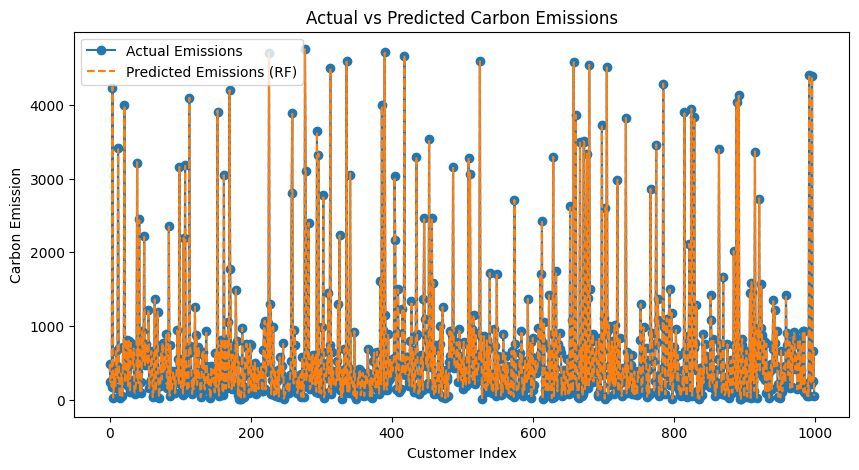

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(comparison_df_actual.index, comparison_df_actual['Actual_Emission'], label="Actual Emissions", marker='o')
plt.plot(comparison_df_actual.index, comparison_df_actual['RandomForest_Predicted'], label="Predicted Emissions (RF)", linestyle='dashed')
plt.legend()
plt.xlabel("Customer Index")
plt.ylabel("Carbon Emission")
plt.title("Actual vs Predicted Carbon Emissions")
plt.show()

The orange line follows the blue trend quite closely overall.

The model seems to capture both low and high emissions well, even the spikes.

This suggests the Random Forest is doing a solid job at predicting customer emissions.



ASSIGNING LOYALTY SCORES

In [46]:
# Now map loyalty scores to each segment
score_map = {
    'Eco-Friendly': 5,
    'Moderate': 3,
    'High Carbon Spender': 2
}
customer_features['Loyalty_Score'] = customer_features['Segment'].map(score_map)

♻ Customers with eco-friendly spendings will get more loyalty points that means they will be getting extra benefits from the Bank.

Whereas customers with high carbon emissions through transactions will be beniffited the least by the Bank.

In [47]:
customer_features.head()

,Customer_ID,Predicted_Emission,Carbon_Score,Cluster,Segment,PC1,PC2,Loyalty_Score
0,1,0.824993,3.111111,2,Moderate,-0.038550,-0.411385,3
1,2,1.009009,3.181818,1,High Carbon Spender,0.526733,-0.061900,2
2,3,1.004422,2.818182,1,High Carbon Spender,-0.039576,0.481608,2
3,4,0.914348,3.200000,2,Moderate,0.319191,-0.324932,3
4,5,1.190970,2.538462,1,High Carbon Spender,-0.002750,1.372140,2


REGULATORY COMPLIANCE

✅ What is Regulatory Compliance?

Regulatory compliance refers to adhering to environmental rules, laws, and standards that aim to reduce pollution and ensure sustainable practices. In this context, it means ensuring that carbon emissions per transaction are within allowed limits set for different categories (like flights, fuel, groceries, etc.).

In [48]:
# Defining regulatory thresholds
regulatory_thresholds = {
    "Electricity": 0.50,
    "Flights": 2.00,
    "Fuel": 3.00,
    "Groceries": 0.20,
    "Hotel Stay": 1.20,
    "Online Shopping": 0.30,
    "Public Transport": 0.10,
    "Dining": 0.35,
    "Ride Sharing": 0.90
}
# Function to map one-hot encoded columns to original transaction type
def get_transaction_type(row):
    for col in regulatory_thresholds:
        encoded_col = f'Transaction_Type_{col}'
        if encoded_col in row and row[encoded_col]:
            return col
    return "Unknown"
# Apply the function to create a readable 'Transaction_Type' column
df['Transaction_Type'] = df.apply(get_transaction_type, axis=1)
# Applying regulatory compliance function using Predicted Emissions
def check_regulatory_compliance_with_predictions(df):
    # Calculate expected emissions
    df["Expected_Emission"] = df.apply(
        lambda row: row["Amount_Spent"] * regulatory_thresholds.get(row["Transaction_Type"], 0),
        axis=1
    )
    # Calculate excess
    df["Excess_Emission"] = df["Predicted_Emission"] - df["Expected_Emission"]
    # Compliance status
    df["Compliance_Status"] = df["Excess_Emission"].apply(
        lambda x: "Non-Compliant" if x > 0 else "Compliant"
    )
    def assign_score(excess):
       if excess <= -15:
         return 5
       elif excess <= -7:
         return 4
       elif excess <= -2:
          return 3
       elif excess <= 0:
          return 2
       else:
          return 1
    df["Regulatory_Compliance_Score"] = df["Excess_Emission"].apply(assign_score)
    return df
df = check_regulatory_compliance_with_predictions(df)

Each value here represents the maximum allowed carbon emission per unit of money spent for each transaction type.

Example:

If someone spends ₹100 on Flights, the allowed emission = 100 × 2.0 = 200 kg CO₂.

We're converting machine-friendly one-hot encoded features back into human-readable transaction types (like "Flights", "Groceries", etc.).

**Expected_Emission:** What the carbon emission should be based on regulations.

**Predicted_Emission:** What your model predicts the emission actually is.

**Excess_Emission:** Difference between actual and allowed — if positive, the customer is non-compliant.

 **Scoring System:**
You assign a Regulatory_Compliance_Score from 1 to 5, where:

5 = Excellent (well below emission limit)

1 = Very poor (much above limit)

This scoring helps quantify sustainability behavior.




In [49]:
df.head()

,Transaction_ID,Customer_ID,Amount_Spent,Frequency,Estimated_Emission,Transaction_Type_Electricity,Transaction_Type_Flights,Transaction_Type_Fuel,Transaction_Type_Groceries,Transaction_Type_Hotel Stay,...,Location_Suburban,Location_Urban,Spending_Frequency_Interaction,Predicted_Emission,Carbon_Score,Transaction_Type,Expected_Emission,Excess_Emission,Compliance_Status,Regulatory_Compliance_Score
0,1,183,6.707078,29,286.011806,False,False,False,False,False,...,False,False,194.505268,0.091759,3,Unknown,0.000000,0.091759,Non-Compliant,1
1,2,140,5.193030,27,89.506567,True,False,False,False,False,...,False,False,140.211805,0.091622,5,Electricity,2.596515,-2.504893,Compliant,3
2,3,50,6.778207,2,350.996916,False,False,False,False,True,...,False,True,13.556414,0.092464,3,Hotel Stay,8.133849,-8.041385,Compliant,4
3,4,361,6.442722,28,188.134226,False,False,False,False,False,...,True,False,180.396211,0.090962,4,Online Shopping,1.932817,-1.841854,Compliant,2
4,5,40,7.124441,23,248.190780,False,False,False,True,False,...,False,False,163.862146,0.091780,4,Groceries,1.424888,-1.333108,Compliant,2


In [52]:
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(customer_features, "customer_features.pkl")  # with Cluster, Segment, Loyalty_Score

['customer_features.pkl']

/tmp/ipython-input-50-3263073061.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=compliance_counts.index, y=compliance_counts.values, palette=['green', 'red','orange','cyan','blue'])


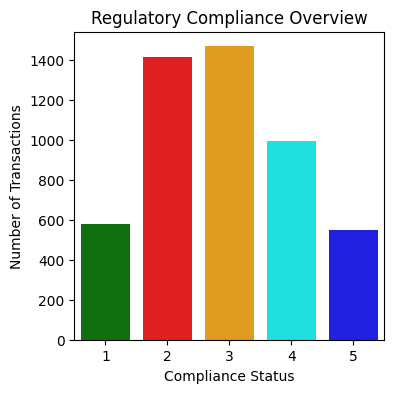

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
# Counting the number of compliant vs non-compliant transactions
compliance_counts = df['Regulatory_Compliance_Score'].value_counts()
plt.figure(figsize=(4,4))
sns.barplot(x=compliance_counts.index, y=compliance_counts.values, palette=['green', 'red','orange','cyan','blue'])
plt.xlabel("Compliance Status")
plt.ylabel("Number of Transactions")
plt.title("Regulatory Compliance Overview")
plt.show()

**📈 Insights from the Chart:**

Most transactions fall under Status 3 and 2, which means a large number of users are just borderline compliant or slightly over-emitting.

Status 1 has fewer transactions (~580), indicating that very poor compliance is relatively low, which is good.

Status 4 and 5 (good to excellent compliance) are moderate to low in volume, meaning there's room for improvement in making users more eco-friendly.

**🌍 What This Tells Us:**

The system is correctly categorizing emissions behavior.

A majority of users are in the mid-compliance range (2-3).

**Banks or stakeholders can focus on:**

Incentivizing users to move from 2 → 4 or 5

Targeting users in category 1 with educational or corrective interventions

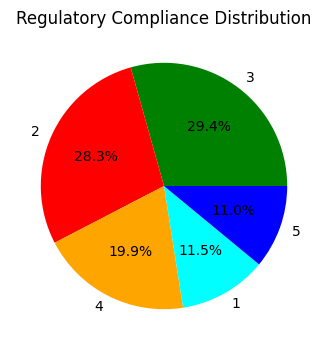

In [51]:
# Pie chart of compliance
plt.figure(figsize=(4,4))
plt.pie(compliance_counts, labels=compliance_counts.index, autopct='%1.1f%%', colors=['green', 'red','orange','cyan','blue'])
plt.title("Regulatory Compliance Distribution")
plt.show()

🏦 Why Does This Help Banks?

**Sustainable Finance Ratings:**

Banks can reward eco-friendly customers with better interest rates or cashback on green purchases.

**ESG Reporting:**

Banks are under pressure to align with Environmental, Social, Governance (ESG) goals. This data helps them show they’re financing greener behavior.

**Risk Management:**

Customers with high carbon footprints may face future taxes or penalties — which banks want to track early.

**Green Lending:**

Banks can launch “green credit cards” or loans based on low emission scores.



🌍 How Does It Help the Environment?

**Awareness:**

Customers get feedback on their carbon footprint, encouraging more sustainable choices.

**Data-Driven Policies:**

Governments can use this data to create targeted carbon policies (e.g., higher tax on non-compliant activities).

**Behavioral Change:**

Giving customers a score motivates them to spend more sustainably, especially if it affects their financial perks.

